# HW1 - Part 2
## CS-5891-01 Special Topics Deep Learning
## Ronald Picard

In this noteboook we will walk through how to perform linear regression using gradient decent. The goal for this example is to predict what the a good market price should be for your home given previous data for the price based on size (square footage) and the number of bedrooms. The input data to our model will the size of a home and the number of bedrooms, and the output data of our model will be a good market price. Since this is a 3-D linear regression model, the equation of 3-D line (z = b + a * x + b * y) will be our model. 

To start we need import some needed classes.

In [32]:
import os
import numpy as np
import struct
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pyplot
import csv
import time

First, we must change our path string to the path of our data file containing the features. (Please note that you must change this string to point to the housing_price_data.txt data file on your machine.) The data file is a csv-style matrix made up of 3 feature vectors (columns). Each entry in the first feature vector is the size of a particular house, each entry in the second feature vector is the number of bedrooms of the particular house, and each entry in the third feature vector is the price of that house. Each feature vector is of the same size, and there is a one-to-one correspondence between each indexed vector entry of the first, second, and third feature vectors in the feature matrix.

In [33]:
## path
path = 'C:/Users/computer/Desktop/git/deep-learning-jupyter-notebooks/1-linear-regression-using-gradient-descent/housing_price_data.txt'

Next, we retrieve the data from the data file as follows. This imports the feature data into a feature matrix from which we can extract each feature vector.

In [34]:
## retreive data        
data = np.genfromtxt(path, delimiter=',', dtype=np.float64)
size_vector = data[:,0]
bedrooms_vector = data[:,1]
price_vector = data[:,2]
#print(size_vector)
#print(bedrooms_vector)
#print(price_vector)

Next, we will normalize each of our feature vectors to (approximately) between -1 <= x <= 1. This will reduce the bias towards the larger feature and provide a more balanced model. We do this by using the using the formula: x(i) = (x(i) - Mean(x))/Std(x). The technique is known as feature scaling. (Please note that this means if we utilize our model later on, the input data must be normalized to produce an accurate prediction.)

In [35]:
## rectrieve size
m = np.size(price_vector)

## find the mean
size_mean = np.mean(size_vector)
bedrooms_mean = np.mean(bedrooms_vector)
price_mean = np.mean(price_vector)
#print('size mean: ' + str(size_mean) + ', bedrooms mean: ' + str(bedrooms_mean) + ', price: ' + str(price_mean))

## find the std
size_std = np.std(size_vector)
bedrooms_std = np.std(bedrooms_vector)
price_std = np.std(price_vector)
#print('size std: ' + str(size_std) + ', bedrooms std:' + str(bedrooms_std) + ', price std: ' + str(price_std))

## normalize the data to between -1 <= x_j <= 1 using equation x_j^i = (x_j^i - u_j)/s_j 
size_mean_vector = np.multiply(size_mean, np.ones(np.size(size_vector)))
#print(size_mean_vector)
normalized_size_vector = np.dot(1/size_std, size_vector-size_mean_vector)
#print(normalized_size_vector)
bedrooms_mean_vector = np.multiply(bedrooms_mean, np.ones(np.size(bedrooms_vector)))
#print(bedrooms_mean_vector)
normalized_bedrooms_vector = np.dot(1/bedrooms_std, bedrooms_vector - bedrooms_mean_vector)
#print(normalized_bedrooms_vector)
price_mean_vector = np.multiply(price_mean, np.ones(np.size(price_vector)))
#print(price_mean_vector)
normalized_price_vector = np.dot(1/price_std, price_vector - price_mean_vector)
#print(normalized_price_vector)


## create feature matrix
x = np.column_stack((np.ones(m), normalized_size_vector, normalized_bedrooms_vector))
#print(x[:,0])
#print(x[:,1])
#print(x[:,2])

## re-assignment
y = normalized_price_vector
#print(y)

Now we create our 3 X 1 parameter vector with values initialized to 1. The reason that our parameter vector contains only three values is because we are trying to perform a 3-D linear regression. This means we need to find the parameter values for the equation of a 3-D line h(x) = theta0 + theta1 * x theta2 * x (this is analagous to our z = d + a * x + b * y equation). (Please note that the initial value of 1 was chosen pesudo-arbitrarly. We could have just as easily chosen 0.5 and recieved (nearly) the same result for a linear regression model.)

In [36]:
## create parameter vector
theta = np.array([1, 1, 1])
#print(theta)

Now that our model is set up and preprocessing is complete we need contruct our gradient descent algrorithm. This algorithm makes use of NumPy to perform linear alebra operations in a vectorized manner. The goal of our gradient decent algorithm is to minimize our cost function; which in this case is the least means squared. Calculating cost function gradient, multiplying it by the learning rate (step size), and subtracting this from the parameter vector iteratively will eventually lead us to the minima of our cost function and thus the ideal model parameters.

There are three primary interative steps to our gradient decsent algorithm: 

1) Calculate the value of the cost function: j = (1/(2m)) * (X * Theta - Y)' * (X * Theta - Y). 

2) Calculate the value of the gradient of the cost function: dj_dTheta = (1/m) * (X' * X * Theta - X' * Y) 

3) Update the theta vector: Theta = Theta - alpha * dj_dTheta

In the above steps: m = size of our feature vectors, Theta = parameter vector, Y = output profit feature vector, X = input feature matrix, j = cost function value, dj_dTheata = gradient vector with respect to the Theta vector, alpha = learning rate hyper-paramerter

These steps repeat for the specified number of iterations. The final result of the Theta vector provides the values of theta0, theta1, and theta2 corresponding to our line equation.

While our algorithm is running we will collect the cost function values and the corresponding interation # in two arrays that will allow us to plot the cost function value as a function of the number iterations; which will allow us see a plot of the learning curve for our gradient descent algorithm. 

In [37]:
# retrieve start time
start = time.time()

## begin gradiant descent
alpha = 0.1
interations = 100
j_array = []
i_array = []
for i in range(interations):
    
    # calculate cost value
    hx = np.dot(x, theta) # M X 3 times 3 X 1 = M X 1 
    hx_minus_y = hx - y # M X 1 minus M X 1 = M X 1
    hx_minus_y_transpose = np.transpose(hx_minus_y) # (M X 1)^T = 1 X M
    j = np.dot(1/(2*m), np.dot(hx_minus_y_transpose, hx_minus_y)) # scalar * 1 X M times M X 1 = scalar
    j_array.append(j)
    i_array.append(i)

    # calculate gradient vector
    x_transpose_x = np.dot(np.transpose(x), x) # 3 X M times M X 3 = 3 X 3
    x_transpose_x_theta = np.dot(x_transpose_x, theta) # scalar * 3 X 1 = 3 X 1 
    x_transpose_y = np.dot(np.transpose(x), y) # 3 X M times M X 1 = 3 X 1
    dj_dtheta = np.dot(1/m, x_transpose_x_theta - x_transpose_y) # 3 X 1 minus 3 X 1 = 3 X 1

    # update theta vector
    theta = theta - np.dot(alpha, dj_dtheta) # 3 X 1 - scalar * 3 X 1 = 3 X 1

    #input("Press Enter to continue...")

# retrieve end time
end = time.time()

# logger data
print('elapsed time: ' + str(end-start) + ' ms')
print('final cost function value: ' + str(j))
print('interations: ' + str(interations))
print('Normalized Parameters: theta0: ' + str(theta[0]) + ', theta1: ' + str(theta[1]), ', theta3: ' + str(theta[2]))

elapsed time: 0.0019927024841308594 ms
final cost function value: 0.008769467118571728
interations: 100
Normalized Parameters: theta0: 2.6561398887836924e-05, theta1: 0.2583387777030867 , theta3: 0.7367893894351465


As printed above, the parameters after 100 iterations came out to (approximatly) the following as shown above:

1) theta0 = 2.6561398887530704e-05

2) theta1 = 0.8795566151371863

3) theta2 = -0.04796939659432394

Therefore, our 3-D line equation becomes: 

Price = 2.6561398887530704e-05 + 0.8795566151371863 * Size -0.04796939659432394 * Bedrooms 

Finally we will plot the results. 

1) The first plot is normalized line solution of the gradient decent algorithm. 

2) The second plot is denormalized line solution of the gradient decent algorithm. 

3) The third plot is the learning curve that relates the cost function value to the number of iterations of the algorithm. As seen by this plot, the cost function converges rapidly in about 20 iterations at a 0.1 leraning rate. 

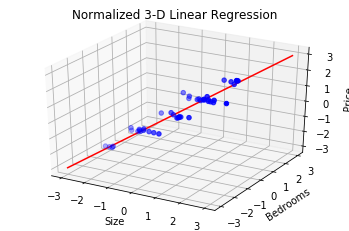

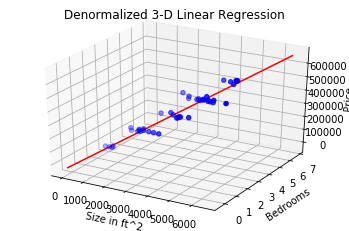

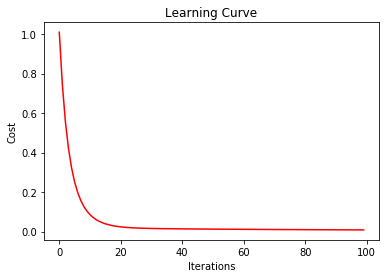

In [38]:
# plot results

# plot normalized linear regression
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(normalized_size_vector, normalized_bedrooms_vector, normalized_price_vector, c='b', marker='o')
normalized_xmin = -3
normalized_xmax = 3
normalized_h_x_min = theta[0] + np.multiply(theta[1], normalized_xmin) + np.multiply(theta[2], normalized_xmin)
normalized_h_x_max = theta[0] + np.multiply(theta[1], normalized_xmax) + np.multiply(theta[2], normalized_xmax)
ax.plot3D([normalized_xmin, normalized_h_x_max], [normalized_xmin, normalized_h_x_max], [normalized_h_x_min, normalized_h_x_max], 'red')
ax.set_title('Normalized 3-D Linear Regression')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
pyplot.show()

# plot denormalized linear regression
xmin_size = np.dot(normalized_xmin, size_std) + size_mean
xmax_size = np.dot(normalized_xmax, size_std) + size_mean
xmin_bedrooms = np.dot(normalized_xmin, bedrooms_std) + bedrooms_mean
xmax_bedrooms = np.dot(normalized_xmax, bedrooms_std) + bedrooms_mean
h_x_min  = np.dot(normalized_h_x_min, price_std) + price_mean
h_x_max  = np.dot(normalized_h_x_max, price_std) + price_mean
fig2 = pyplot.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter3D(size_vector, bedrooms_vector, price_vector, c='b', marker='o')
ax2.plot3D([xmin_size, xmax_size], [xmin_bedrooms, xmax_bedrooms], [h_x_min, h_x_max], 'red')
ax2.set_title('Denormalized 3-D Linear Regression')
ax2.set_xlabel('Size in ft^2')
ax2.set_ylabel('Bedrooms')
ax2.set_zlabel('Price')
pyplot.show()

# plot learning curve
pyplot.figure()
pyplot.plot(i_array, j_array, 'red')
pyplot.title('Learning Curve')
pyplot.xlabel('Iterations')
pyplot.ylabel('Cost')
pyplot.show()

I currently live in an apartment; however, for illustration we will test this model on my apartment as if it were a house. The features of my apartment are as follows:

Size (ft^2): 925
Number of Bedrooms: 2

Now we will use our model to predict a good market price given the features of my house. 

In [39]:
# features
size_feature_value = 925
bedrooms_feature_value = 2

# perform normalization of the features
normalized_size_feature_value = np.dot(1/size_std, size_feature_value - size_mean)
normalized_bedrooms_feature_value = np.dot(1/bedrooms_std, bedrooms_feature_value - bedrooms_mean)

# normalized price
normalized_price = theta[0] + theta[1]*normalized_size_feature_value + theta[2]*normalized_bedrooms_feature_value

# denormalize the price
price  = np.dot(normalized_price, price_std) + price_mean

print('Nomalized Good Market Price: $' + str(normalized_price))
print('Good Market Price: $' + str(price))

Nomalized Good Market Price: $-1.2963059031963535
Good Market Price: $166000.26594221333


As illustrated, a good market price for my house based on this model is approximately $166000.27. This looks correct based on our denormalized linear regression plot shown above.

This concludes part 2.